In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import missingno as msno
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier


In [2]:
#read the dataframe
df = pd.read_csv('/content/drive/MyDrive/Parkinson disease/ar/pd_speech_features.csv')
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


#EDA and pre-processing

In [3]:
temp_df = df[['gender','PPE','DFA','RPDE','numPulses','numPeriodsPulses','meanPeriodPulses',
'stdDevPeriodPulses','locPctJitter','locAbsJitter','rapJitter',
'ppq5Jitter','ddpJitter','minIntensity','maxIntensity','class','meanAutoCorrHarmonicity',
'meanNoiseToHarmHarmonicity',]]

In [4]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   gender                      756 non-null    int64  
 1   PPE                         756 non-null    float64
 2   DFA                         756 non-null    float64
 3   RPDE                        756 non-null    float64
 4   numPulses                   756 non-null    int64  
 5   numPeriodsPulses            756 non-null    int64  
 6   meanPeriodPulses            756 non-null    float64
 7   stdDevPeriodPulses          756 non-null    float64
 8   locPctJitter                756 non-null    float64
 9   locAbsJitter                756 non-null    float64
 10  rapJitter                   756 non-null    float64
 11  ppq5Jitter                  756 non-null    float64
 12  ddpJitter                   756 non-null    float64
 13  minIntensity                756 non

In [5]:
temp_df.describe()

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,rapJitter,ppq5Jitter,ddpJitter,minIntensity,maxIntensity,class,meanAutoCorrHarmonicity,meanNoiseToHarmHarmonicity
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,7.560000e+02,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,1.673391e-05,0.000605,0.001159,0.001815,70.828609,76.135371,0.746032,0.961508,0.051131
std,0.500079,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,2.290134e-05,0.000981,0.001677,0.002942,8.858268,6.446451,0.435568,0.064095,0.104579
min,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,6.860000e-07,0.000020,0.000050,0.000050,28.651529,44.133492,0.000000,0.589609,0.000618
25%,0.000000,0.762833,0.647053,0.386537,251.000000,250.000000,0.005003,0.000049,0.000970,5.260000e-06,0.000150,0.000370,0.000450,67.248014,73.322769,0.000000,0.963341,0.007168
50%,1.000000,0.809655,0.700525,0.484355,317.000000,316.000000,0.006048,0.000077,0.001495,9.530000e-06,0.000280,0.000650,0.000840,74.121030,78.581351,1.000000,0.984339,0.016273
75%,1.000000,0.834315,0.754985,0.586515,384.250000,383.250000,0.007528,0.000171,0.002520,1.832500e-05,0.000650,0.001253,0.001952,76.850515,80.402498,1.000000,0.992916,0.040060
max,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,2.564800e-04,0.011050,0.018320,0.033150,83.908349,86.316176,1.000000,0.999382,0.761696


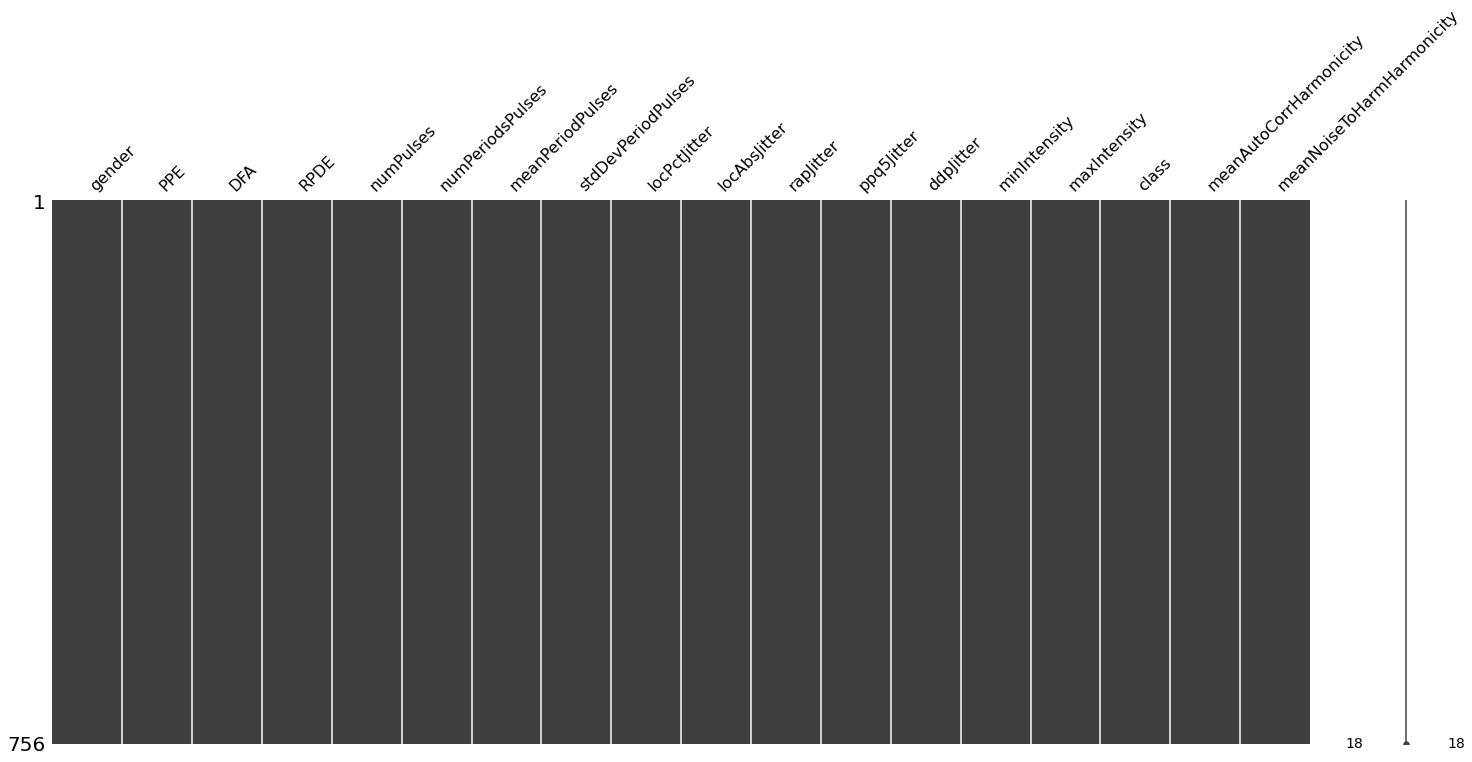

In [6]:
msno.matrix(temp_df)

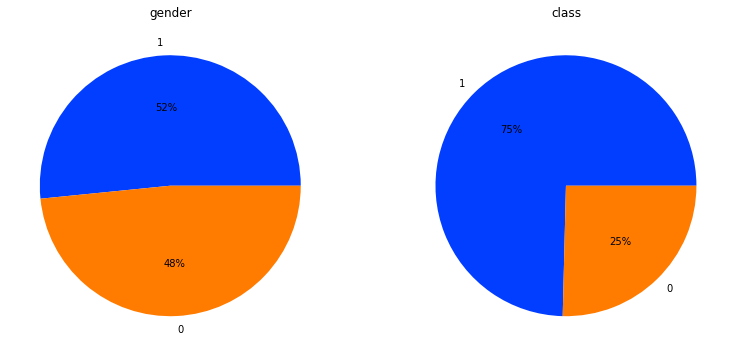

In [7]:
# define Seaborn color palette to use
palette_color = sns.color_palette('bright')

#grid size
fig,ax = plt.subplots(1,2, figsize=(13, 6))

#gender ratio in the dataset
gender = dict(df['gender'].value_counts())
data = list(gender.values())
keys = list(gender.keys())
_ = ax[0].pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
_ = ax[0].set_title('gender')

#disease ratio in the dataset
class_ = dict(df['class'].value_counts())
data = list(class_.values())
keys = list(class_.keys())
_ = ax[1].pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
_ = ax[1].set_title('class')


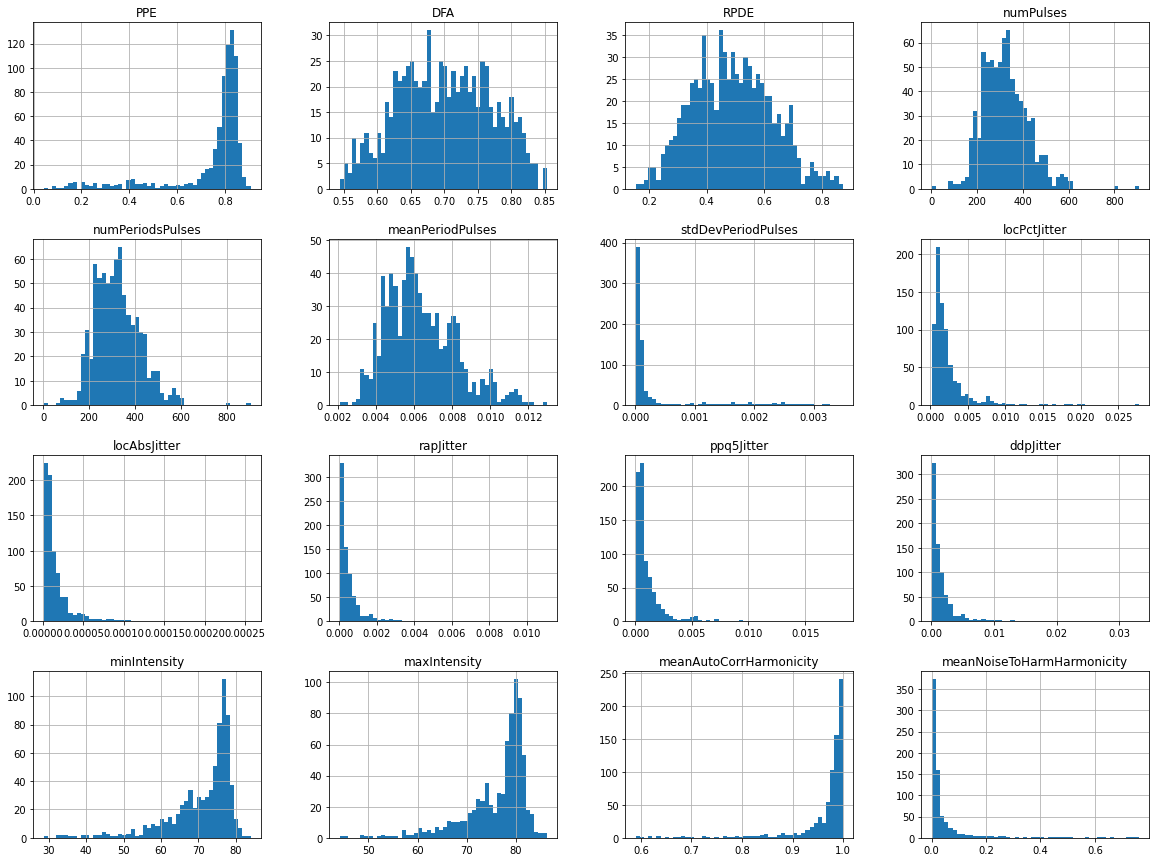

In [8]:
# Plot histograms for each numerical column
df[['PPE','DFA',	'RPDE',	'numPulses',	'numPeriodsPulses',	'meanPeriodPulses',	'stdDevPeriodPulses',	'locPctJitter',	'locAbsJitter',	'rapJitter',	'ppq5Jitter',	'ddpJitter',	'minIntensity',	'maxIntensity',	'meanAutoCorrHarmonicity',	'meanNoiseToHarmHarmonicity']].hist(bins=50, figsize=(20,15))
plt.show()

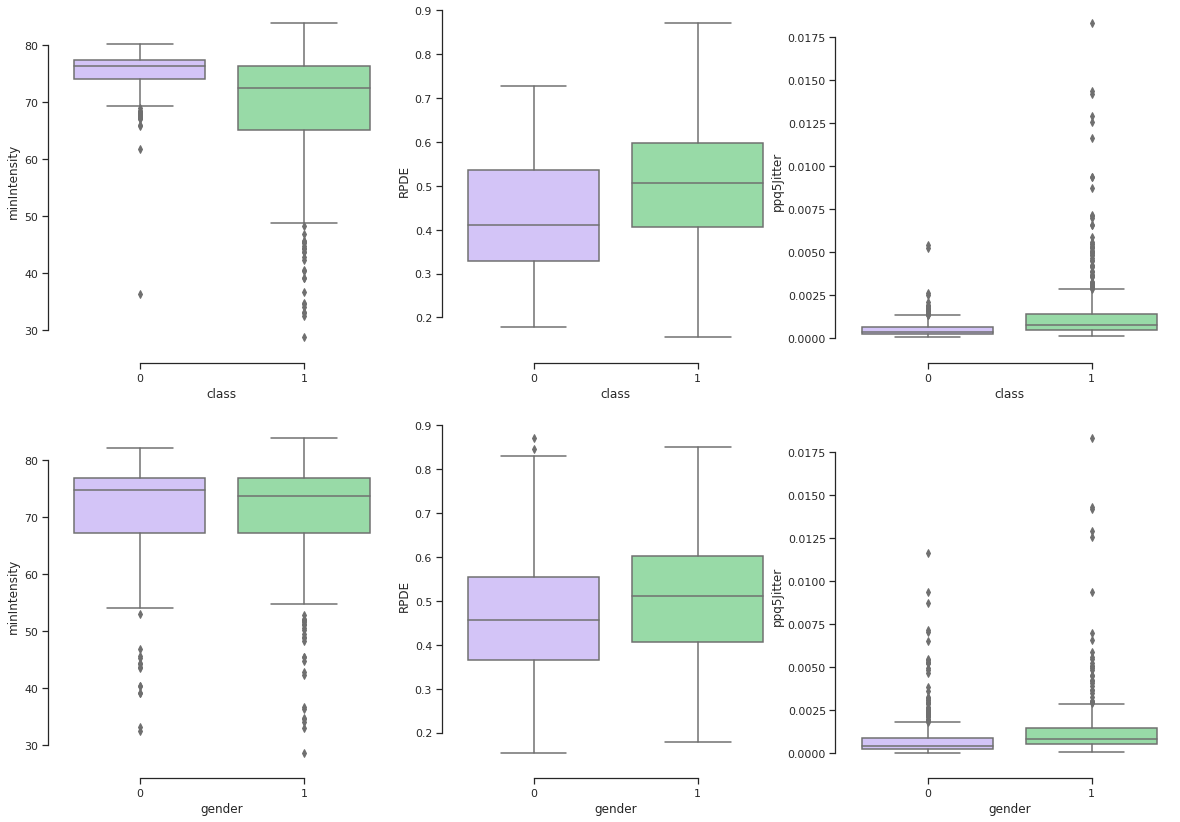

In [9]:
#set style
sns.set_theme(style="ticks", palette="pastel")

#grid size
fig,ax = plt.subplots(2,3, figsize=(20, 14))

#outliers detection 
sns.boxplot(x="class", y="minIntensity", palette=["m", "g"],data=df, ax=ax[0][0])
sns.boxplot(x="class", y="RPDE", palette=["m", "g"],data=df, ax=ax[0][1])
sns.boxplot(x="class", y="ppq5Jitter", palette=["m", "g"],data=df, ax=ax[0][2])

sns.boxplot(x="gender", y="minIntensity", palette=["m", "g", "y"],data=df, ax=ax[1][0])
sns.boxplot(x="gender", y="RPDE", palette=["m", "g", "y"],data=df, ax=ax[1][1])
sns.boxplot(x="gender", y="ppq5Jitter", palette=["m", "g", "y"],data=df, ax=ax[1][2])

sns.despine(offset=10, trim=True)

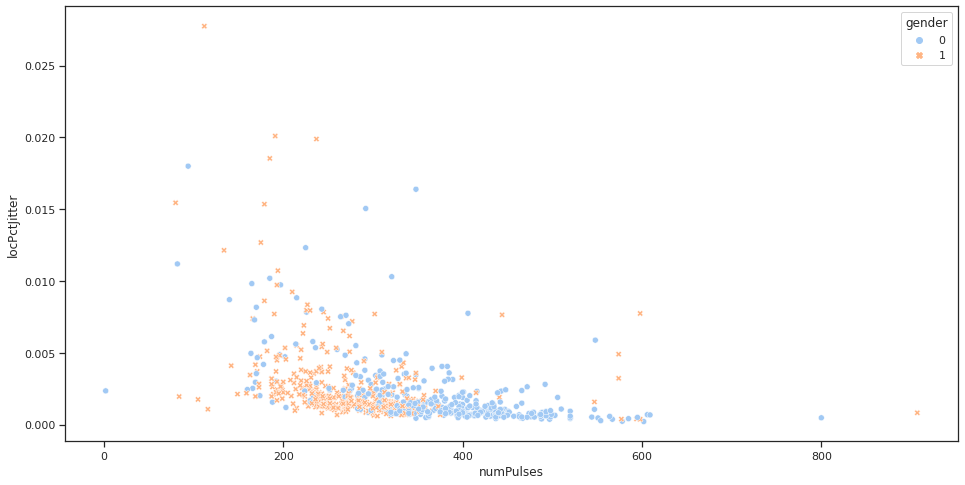

In [10]:
fig = plt.figure(figsize=(16, 8))
_ = sns.scatterplot(data=df, x="numPulses", y="locPctJitter", hue="gender", style="gender")

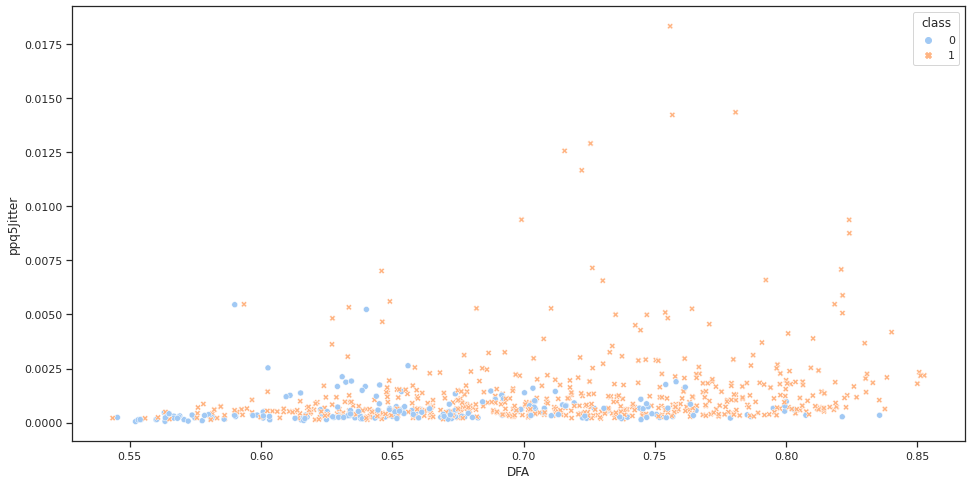

In [11]:
fig = plt.figure(figsize=(16, 8))
_ = sns.scatterplot(data=df, x="DFA", y="ppq5Jitter", hue="class", style="class")

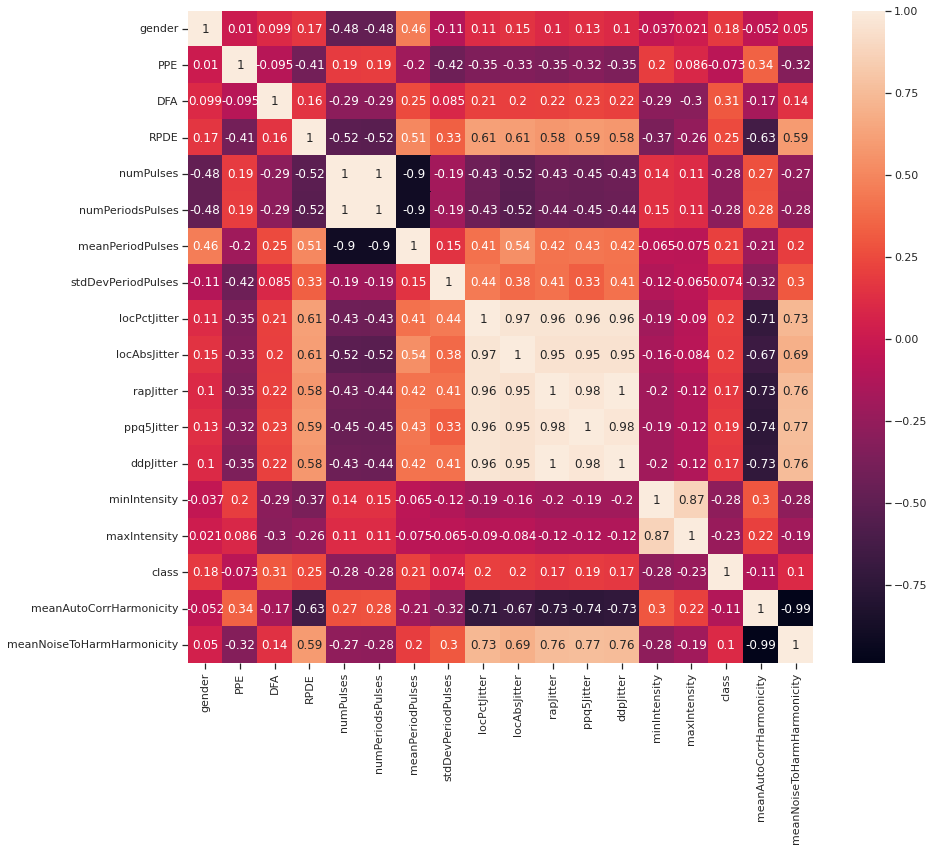

In [12]:
#pearson correlation coefficent
fig = plt.figure(figsize=(14, 12))
_ = sns.heatmap(temp_df.corr(), annot=True)

In [13]:
#select columns having correlation above the given threshold
threshold = 0.3

temp_df = df.corr()['class'].reset_index()
temp_df['class'] = temp_df['class'].apply(lambda x : abs(x))
df = df[temp_df[temp_df['class'] >= threshold]['index'].to_list()]

In [14]:
#seperate into independent and dependent set
X, y = df.drop('class', axis=1), df['class']

#normalize the data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [15]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print('training samples : {}  testing samples : {}'.format(X_train.shape[0], X_test.shape[0]))

training samples : 680  testing samples : 76


#ML algorithms

####MLP

In [17]:
#multi layer perceptron
clf = MLPClassifier(random_state=1, early_stopping=True, learning_rate='adaptive', hidden_layer_sizes=[16, 32, 64, 8], max_iter=300)
clf.fit(X_train, y_train)


#train and test prediction
y_test_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)

mlp_train_accuracy = accuracy_score(y_train, y_train_pred)
mlp_test_accuracy = accuracy_score(y_test, y_test_pred)

#print scores
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.67      0.40      0.50        15
           1       0.87      0.95      0.91        61

    accuracy                           0.84        76
   macro avg       0.77      0.68      0.70        76
weighted avg       0.83      0.84      0.83        76



####Naive Bayes

In [22]:
clf = GaussianNB()
clf.fit(X_train,y_train)


#train and test prediction
y_test_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)

gnb_train_accuracy = accuracy_score(y_train, y_train_pred)
gnb_test_accuracy = accuracy_score(y_test, y_test_pred)

#print scores
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.61      0.73      0.67        15
           1       0.93      0.89      0.91        61

    accuracy                           0.86        76
   macro avg       0.77      0.81      0.79        76
weighted avg       0.87      0.86      0.86        76



####Logistic Regression

In [20]:
#parametetrs
grid={"C":np.logspace(-3,3,7), 
      "penalty":["l1","l2"]}

#sarch optimal parmeters for LogisticRegression
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print("best parameters : ", logreg_cv.best_params_)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

best parameters :  {'C': 1.0, 'penalty': 'l2'}


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
70 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Tracebac

In [23]:
#re-fit the model with opptimal params
lr = LogisticRegression(**logreg_cv.best_params_)
lr.fit(X_train,y_train)

#train and test prediction
y_test_pred = lr.predict(X_test)
y_train_pred = lr.predict(X_train)

lr_train_accuracy = accuracy_score(y_train, y_train_pred)
lr_test_accuracy = accuracy_score(y_test, y_test_pred)

#print scores
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.70      0.47      0.56        15
           1       0.88      0.95      0.91        61

    accuracy                           0.86        76
   macro avg       0.79      0.71      0.74        76
weighted avg       0.84      0.86      0.84        76



####GradientBoostingClassifier

In [24]:
#model parameters
parameters = {
    "learning_rate": [0.01, 0.001, 0.0001],
    "max_depth":[3,5, 7, 8],
    "max_features":["log2","sqrt"],
    "n_estimators":[50, 70, 90, 110]
    }

#fit the model
clf = GridSearchCV(GradientBoostingClassifier(), parameters, cv=10, n_jobs=-1)
clf.fit(X_train, y_train)

print("best parameters : ", clf.best_params_)

best parameters :  {'learning_rate': 0.01, 'max_depth': 7, 'max_features': 'log2', 'n_estimators': 110}


In [27]:
#re-fit the model with opptimal params
gb = GradientBoostingClassifier(**clf.best_params_)
gb.fit(X_train,y_train)

#train and test prediction
y_test_pred = gb.predict(X_test)
y_train_pred = gb.predict(X_train)

gb_train_accuracy = accuracy_score(y_train, y_train_pred)
gb_test_accuracy = accuracy_score(y_test, y_test_pred)

#print scores
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.89      0.53      0.67        15
           1       0.90      0.98      0.94        61

    accuracy                           0.89        76
   macro avg       0.89      0.76      0.80        76
weighted avg       0.89      0.89      0.88        76



####Random Forest

In [26]:
#optimize model params
rfc=RandomForestClassifier()
param_grid = { 
    'n_estimators': [50, 70, 100, 120],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7],
}

#fit the model
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

print("best parameters : ", CV_rfc.best_params_)

best parameters :  {'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 50}


In [28]:
#re-fit the model with opptimal params
rf = RandomForestClassifier(**CV_rfc.best_params_)
rf.fit(X_train,y_train)

#train and test prediction
y_test_pred = rf.predict(X_test)
y_train_pred = rf.predict(X_train)

rf_train_accuracy = accuracy_score(y_train, y_train_pred)
rf_test_accuracy = accuracy_score(y_test, y_test_pred)

#print scores
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.67      0.53      0.59        15
           1       0.89      0.93      0.91        61

    accuracy                           0.86        76
   macro avg       0.78      0.73      0.75        76
weighted avg       0.85      0.86      0.85        76



In [30]:
#RandomForestClassifier 
classifier1 = RandomForestClassifier(max_depth=6, max_features='sqrt', n_estimators=50)

#Multilayer pereptron classifier
classifier2 = MLPClassifier(random_state=1, early_stopping=True, learning_rate='adaptive', hidden_layer_sizes=[16, 32, 64, 8], max_iter=300)

#GradientBoostingClassifier 
classifier3 = GradientBoostingClassifier(learning_rate= 0.01, max_depth=7,max_features='log2',n_estimators=110)


#LOgistic rgression classifier
classifier4 = LogisticRegression(C= 1.0, penalty='l2')

stack_classifiers = [('rf', classifier1), ('mlp', classifier2), 
                     ('gb', classifier3)]

#stacking classifier with meta classifier
model = StackingClassifier(estimators=stack_classifiers, final_estimator=classifier4, cv=5)

#train model
model.fit(X_train, y_train)

#train and test prediction
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

stacked_train_accuracy = accuracy_score(y_train, y_train_pred)
stacked_test_accuracy = accuracy_score(y_test, y_test_pred)

#print scores
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.75      0.60      0.67        15
           1       0.91      0.95      0.93        61

    accuracy                           0.88        76
   macro avg       0.83      0.78      0.80        76
weighted avg       0.88      0.88      0.88        76



#Summarize all results

In [41]:
scores = [mlp_train_accuracy,mlp_test_accuracy,gnb_train_accuracy,gnb_test_accuracy,lr_train_accuracy,lr_test_accuracy,
          gb_train_accuracy, gb_test_accuracy ,rf_train_accuracy,rf_test_accuracy,stacked_train_accuracy, stacked_test_accuracy]

Algorithms = ["MultiLayer Perceptron", "MultiLayer Perceptron", "Naive Bayes", "Naive Bayes", "Logistic Regression",
              "Logistic Regression", "Gradient Boosting", "Gradient Boosting", "Random Forest", "Random Forest",
              "Stacked Classifier", "Stacked Classifier"]
test_type = ['Train', 'Test', 'Train', 'Test', 'Train', 'Test', 'Train', 'Test', 'Train', 'Test', 'Train', 'Test']
result_df = pd.DataFrame(list(zip(Algorithms, test_type, scores)), columns=['algorithms', 'type', 'scores'])
result_df['scores'] = result_df['scores'] * 100
result_df

,algorithms,type,scores
0,MultiLayer Perceptron,Train,81.029412
1,MultiLayer Perceptron,Test,84.210526
2,Naive Bayes,Train,78.382353
3,Naive Bayes,Test,85.526316
4,Logistic Regression,Train,84.852941
5,Logistic Regression,Test,85.526316
6,Gradient Boosting,Train,96.470588
7,Gradient Boosting,Test,89.473684
8,Random Forest,Train,92.352941
9,Random Forest,Test,85.526316


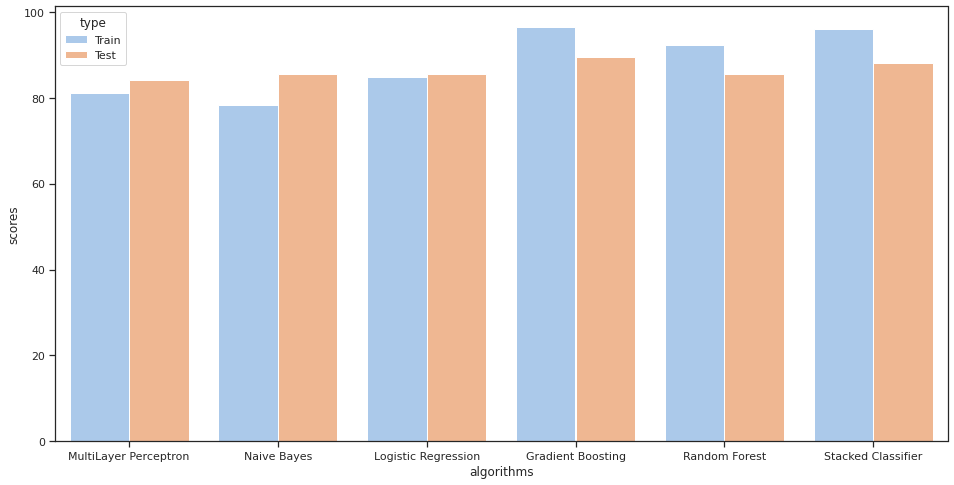

In [45]:
fig = plt.figure(figsize=(16, 8))
_ = sns.barplot(data=result_df, x="algorithms", y="scores", hue="type")